### **Análisis Exploratorio de Datos:** 
---
#### **Para este proceso se tendrá en cuenta el KPI establecido para actuar en base a ello y obtener visualizaciones claves y relevantes para el objetivo**.
#### **Se utilizarán las tablas de la base de datos SQL creada previamente en PostgreSQL.**

- ##### **KPI: Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.**
- ##### **((Nuevo Acceso - Acceso Actual) / Acceso Aactual) * 100**

---

#### CARGA DE DATOS E IMPORTACIÓN DE LIBRERÍAS NECESARIAS

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import psycopg2
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [118]:
# Conexión a la base de datos
conn = psycopg2.connect(
    host="localhost",
    database="telecomunicaciones",
    user="USER",
    password="PASSW"
)

# Consulta SQL para obtener la penetración de internet por provincia y año
query = """
SELECT 
    p.nombre_provincia, 
    pe.anio, 
	pe.trimestre,
    ph.accesos_por_100_hogares
FROM 
    penetracion_internet_hogares ph
JOIN 
    provincias p ON ph.id_provincia = p.id_provincia
JOIN 
    periodos pe ON ph.id_periodo = pe.id_periodo;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame de Pandas
df_penetracion = pd.read_sql(query, conn)

# Cerrar la conexión
conn.close()

# Visualizar el DataFrame
df_penetracion.head()


,nombre_provincia,anio,trimestre,accesos_por_100_hogares
0,buenos aires,2024,1,81.10
1,caba,2024,1,119.53
2,catamarca,2024,1,68.82
3,chaco,2024,1,46.70
4,chubut,2024,1,84.89


#### **PENETRACIÓN DE INTERNET POR CADA 100 HOGARES A PARTIR DE 2023 EN ADELANTE**

##### Este gráfico de barras agrupadas muestra cómo ha evolucionado la penetración de internet en los hogares argentinos para cada provincia, a partir del primer trimestre de 2023 hasta el primer trimestre de 2024. La penetración está medida en términos de accesos a internet por cada 100 hogares.

##### **Observaciones Clave:**

- ##### **Provincias con mayor penetración:** La Ciudad Autónoma de Buenos Aires (CABA), seguida de las provincias Tierra del Fuego y San Luis, presentan los mayores niveles de acceso por 100 hogares, superando el 100% de penetración. Esto indica que más de un dispositivo por hogar tiene acceso a internet en promedio.
- ##### **Provincias con menor penetración:** Provincias como Formosa, Santa Cruz y Chaco muestran los menores niveles de penetración, manteniéndose por debajo del 50% en la mayoría de los trimestres analizados.
- ##### **Estancamiento en el crecimiento:** En la mayoría de las provincias, se observa un estancamiento en la penetración de internet. Los accesos han permanecido dentro de un rango relativamente constante, sin mostrar grandes fluctuaciones ni aumentos significativos. Esto es particularmente notable en provincias como Entre Ríos y Córdoba, donde el crecimiento es casi imperceptible entre trimestres. Sin embargo, en algunas provincias como San Luis y Santa Cruz, el crecimiento es más evidente.

##### **Impacto en la toma de decisiones**: 
##### Este primer análisis puede ayudar a las autoridades y las empresas de telecomunicaciones a identificar las áreas geográficas que requieren mayor inversión y atención para mejorar la infraestructura de internet. Las provincias con menor penetración y estancamiento en el crecimiento pueden beneficiarse de una redistribución de los recursos, lo que podría incluir el desarrollo de redes de fibra óptica, incentivos para la adopción de nuevas tecnologías o subsidios para fomentar el acceso en áreas con menor densidad poblacional.

##### **Conclusión**:
##### El gráfico refleja la necesidad de un impulso en el acceso a internet, especialmente en las provincias donde se observa un estancamiento en los últimos trimestres. Aumentar en un 2% el acceso por cada 100 hogares en el próximo trimestre, puede ser un desafío en provincias con penetración baja y crecimiento lento. No obstante, este KPI es clave para reducir la brecha digital y mejorar la conectividad en las regiones más desfavorecidas.

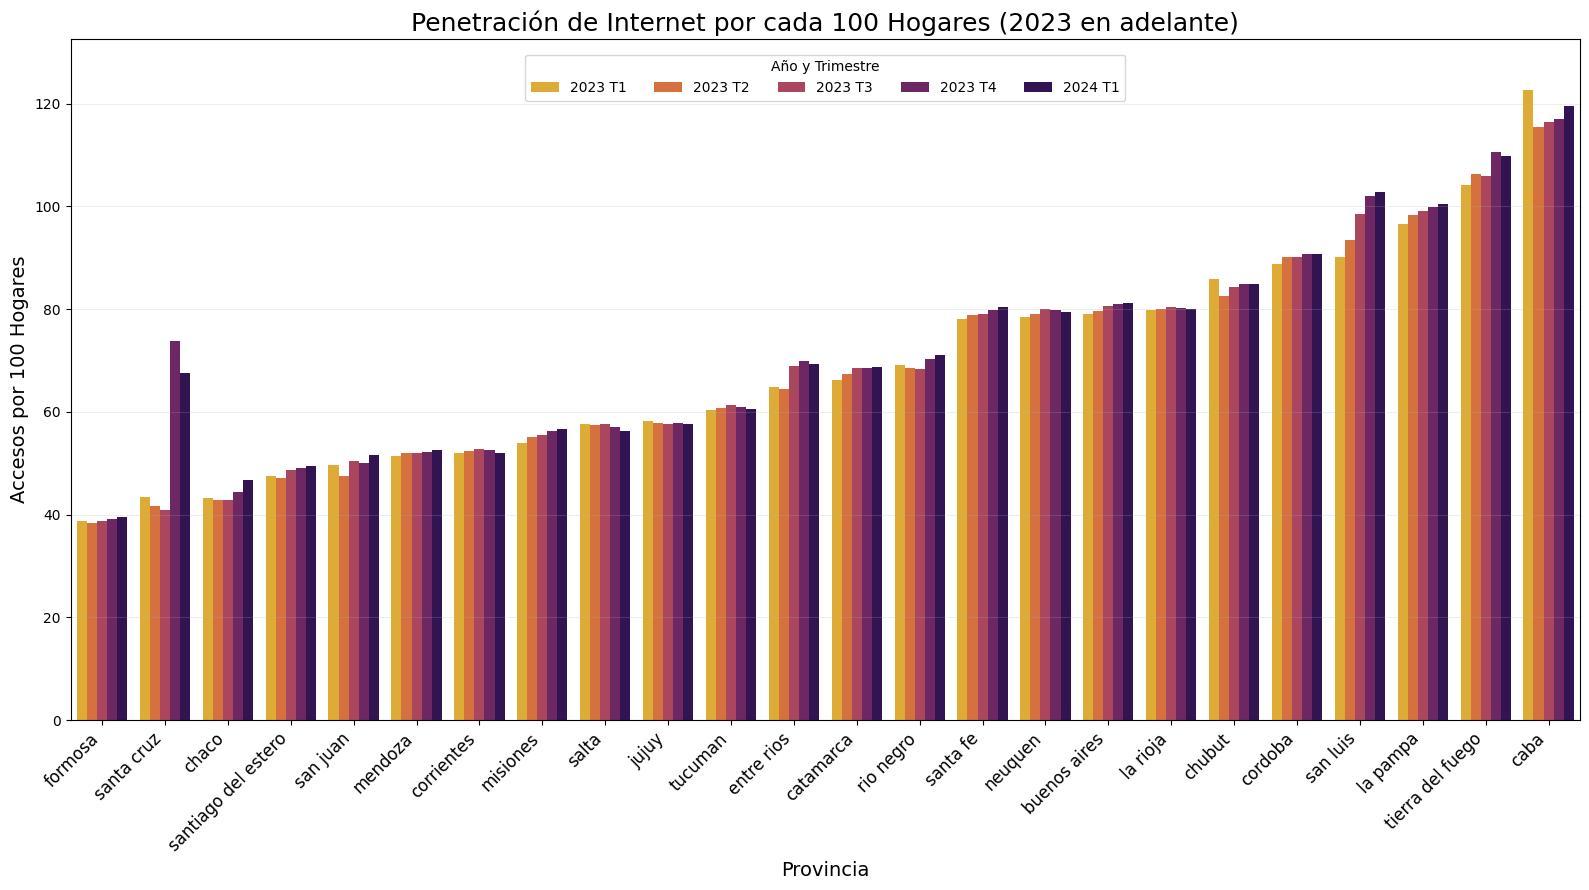

In [82]:
# Se filtran los datos a partir de 2023 para obtener una representación más reciente
df_penetracion_reciente = df_penetracion[df_penetracion['anio'] >= 2023].sort_values('accesos_por_100_hogares')

# Se crea la columna 'anio_trimestre' combinando 'anio' y 'trimestre'
df_penetracion_reciente['anio_trimestre'] = df_penetracion_reciente['anio'].astype(str) + ' T' + df_penetracion_reciente['trimestre'].astype(str)

# Se convierte 'anio_trimestre' en una categoría ordenada para que los trimestres aparezcan en orden (T1 a T4)
orden_trimestres = [
    '2023 T1', '2023 T2', '2023 T3', '2023 T4', '2024 T1'
]
df_penetracion_reciente['anio_trimestre'] = pd.Categorical(df_penetracion_reciente['anio_trimestre'], 
                                                           categories=orden_trimestres, 
                                                           ordered=True)

# Figura
plt.figure(figsize=(16, 9))

# Gráfico de barras agrupadas
sns.barplot(x='nombre_provincia', y='accesos_por_100_hogares', hue='anio_trimestre', 
            data=df_penetracion_reciente, dodge=True, palette='inferno_r')

# Título y etiquetas
plt.title('Penetración de Internet por cada 100 Hogares (2023 en adelante)', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Accesos por 100 Hogares', fontsize=14)

# Se ajusta el límite superior del eje Y
plt.ylim(0, df_penetracion_reciente['accesos_por_100_hogares'].max() + 10)

# Se ajusta la leyenda
plt.legend(title='Año y Trimestre', bbox_to_anchor=(0.5, 0.987), loc='upper center', ncol=5)

# Se agreagan líneas de fondo en el eje Y con baja opacidad
plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5, alpha=0.3)

# Visualización
plt.tight_layout()
plt.show()


#### **COMPARATIVA DE ACCESOS A INTERNET POR CADA 100 HAGARES: Actual vs. Proyectado (2% Aumento)**
#####  Este gráfico de barras agrupadas compara el acceso a internet actual (2024 T1) por cada 100 hogares en todas las provincias argentinas con un acceso proyectado para el próximo trimestre (2024 T2) que incluye un aumento del 2%, tal como lo propone el KPI obligatorio del proyecto.

##### **Observaciones clave:**
1. ##### ***Provincias con mayor acceso proyectado:***
    - **CABA:** Es la provincia con la mayor penetración, superando los 120 accesos por cada 100 hogares tras la proyección del 2% de aumento.
    - **Tierra del Fuego y San Luis:** También presentan altos niveles de acceso, ambos superando los 100 accesos por 100 hogares después del aumento proyectado.
2. ##### ***Provincias con menor acceso proyectado:***
    - Formosa, Chaco y Santiago del Estero: Son las provincias con el menor acceso proyectado, todas permaneciendo por debajo de los 50 accesos por cada 100 hogares incluso tras el aumento del 2%.
3. ##### ***Impacto del aumento del 2%:***
    - **Relativamente homogéneo:** El aumento proyectado del 2% es uniforme a nivel provincial, lo que hace que las diferencias en el gráfico se mantengan relativamente constantes. Sin embargo, aún se observa una gran disparidad entre provincias con alta y baja penetración.
    - **Escalabilidad:** El KPI muestra un crecimiento más significativo en provincias con mayor penetración actual (como CABA y Tierra del Fuego) en términos absolutos, debido a la naturaleza porcentual del aumento.
    
##### **Conclusión:**
##### Este gráfico refleja la necesidad de acciones focalizadas para cerrar la brecha digital entre provincias. Aumentar el acceso en provincias con bajos niveles de penetración debe ser una prioridad más allá del incremento porcentual, ya que el impacto de un aumento uniforme no sería suficiente para nivelar las disparidades actuales.

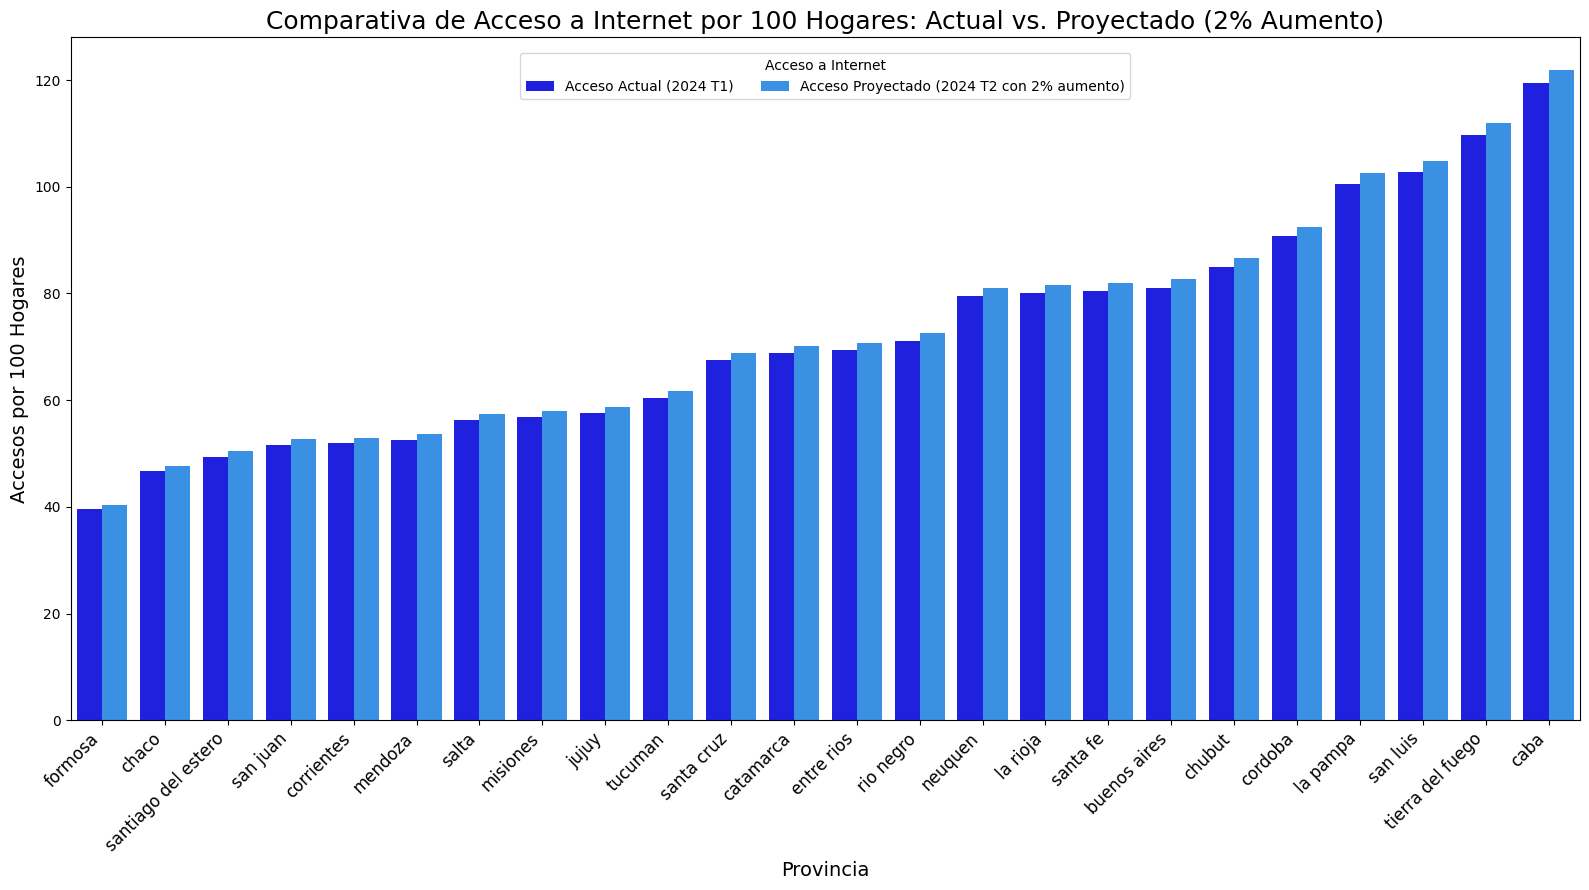

In [59]:
# 1) Cálculo del KPI: Proyección de un 2% de aumento
df_kpi = df_penetracion_reciente[df_penetracion_reciente['anio_trimestre'] == '2024 T1'].copy()

# Se agrega la columna con el nuevo acceso proyectado con un 2% de aumento
df_kpi['acceso_proyectado'] = df_kpi['accesos_por_100_hogares'] * 1.02

# Reorganizamos el DataFrame para que Seaborn pueda manejar las barras
df_kpi_melted = df_kpi.melt(id_vars='nombre_provincia', 
                            value_vars=['accesos_por_100_hogares', 'acceso_proyectado'], 
                            var_name='Acceso', 
                            value_name='Cantidad')

# Cambiamos los nombres para que sean más claros en la leyenda
df_kpi_melted['Acceso'] = df_kpi_melted['Acceso'].replace({
    'accesos_por_100_hogares': 'Acceso Actual (2024 T1)',
    'acceso_proyectado': 'Acceso Proyectado (2024 T2 con 2% aumento)'
})

# 2) Figura y ejes
plt.figure(figsize=(16, 9))

# Gráfico de barras
sns.barplot(x='nombre_provincia', y='Cantidad', hue='Acceso', data=df_kpi_melted, 
            palette=['blue','dodgerblue'])

# Título y etíquetas
plt.title('Comparativa de Acceso a Internet por 100 Hogares: Actual vs. Proyectado (2% Aumento)', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Accesos por 100 Hogares', fontsize=14)

# Ajuste de leyenda
plt.legend(title='Acceso a Internet', bbox_to_anchor=(0.5, 0.987), loc='upper center', ncol=2)

# Visualización
plt.tight_layout()
plt.show()


#### **PENETRACIÓN PROMEDIO DE INTERNET POR REGIÓN (2023 en adelante)**

##### Este gráfico de barras muestra la penetración promedio de internet por cada 100 hogares, agrupada por las principales regiones de Argentina desde el primer trimestre de 2023 hasta el primer trimestre de 2024.

##### **Observaciones Clave:**
- ***Buenos Aires y CABA:*** Esta región destaca significativamente en comparación con el resto del país, con un promedio de acceso superior al 100%, lo que indica una penetración extremadamente alta.

- ***Patagonia y Centro:*** Ambas regiones presentan niveles de penetración elevados. La infraestructura en estas regiones parece estar más desarrollada que en otras.
- ***Cuyo:*** Aunque presenta niveles relativamente altos de penetración, se encuentra por detrás de la Patagonia y la región Centro.
- ***NOA y NEA:*** Estas dos regiones son las que presentan los valores más bajos de penetración. NEA se encuentra con el menor promedio, con aproximadamente un 45% de penetración, lo que indica que casi la mitad de los hogares aún no tienen acceso a internet.

##### **Impacto en la Toma de Decisiones:**
- ***Foco en NEA y NOA:*** Estas regiones requieren una mayor inversión y desarrollo de infraestructura de internet, ya que muestran un rezago significativo en comparación con otras áreas del país. Iniciativas que incluyan la implementación de redes de fibra óptica y subsidios podrían ayudar a mejorar el acceso.

- ***Oportunidades de mejora en Cuyo y Patagonia:*** Aunque estas regiones no están tan rezagadas como NOA y NEA, aún existe margen de mejora, especialmente si se compara con Buenos Aires y CABA.
##### **Conclusión:**
El análisis de la penetración de internet por regiones pone de manifiesto la necesidad de enfocar esfuerzos en el desarrollo de infraestructura y accesibilidad en las regiones más desatendidas. Mejorar en estas áreas no solo ayudará a alcanzar el KPI propuesto del 2% de aumento en penetración, sino que también reducirá la brecha digital entre las distintas regiones del país.

In [93]:
# Listas de provincias por región
noa = ['jujuy', 'salta', 'tucuman', 'catamarca', 'santiago del estero', 'la rioja']
nea = ['misiones', 'corrientes', 'chaco', 'formosa']
cuyo = ['mendoza', 'san juan', 'san luis']
centro = ['cordoba', 'entre rios', 'santa fe']
patagonia = ['la pampa', 'rio negro', 'neuquen', 'chubut', 'santa cruz', 'tierra del fuego']
bs_as_caba = ['buenos aires', 'caba']

# Condiciones para cada región
conditions = [
    df_penetracion['nombre_provincia'].str.lower().isin(noa),
    df_penetracion['nombre_provincia'].str.lower().isin(nea),
    df_penetracion['nombre_provincia'].str.lower().isin(cuyo),
    df_penetracion['nombre_provincia'].str.lower().isin(centro),
    df_penetracion['nombre_provincia'].str.lower().isin(patagonia),
    df_penetracion['nombre_provincia'].str.lower().isin(bs_as_caba)
]

# Nombres de las regiones correspondientes
choices = ['NOA', 'NEA', 'Cuyo', 'Centro', 'Patagonia', 'Buenos Aires y CABA']

# Se crea la columna 'region' usando np.select()
df_penetracion['region'] = np.select(conditions, choices, default='Desconocida')

# Estructura del df
df_penetracion.head()


,nombre_provincia,anio,trimestre,accesos_por_100_hogares,region
0,buenos aires,2024,1,81.10,Buenos Aires y CABA
1,caba,2024,1,119.53,Buenos Aires y CABA
2,catamarca,2024,1,68.82,NOA
3,chaco,2024,1,46.70,NEA
4,chubut,2024,1,84.89,Patagonia


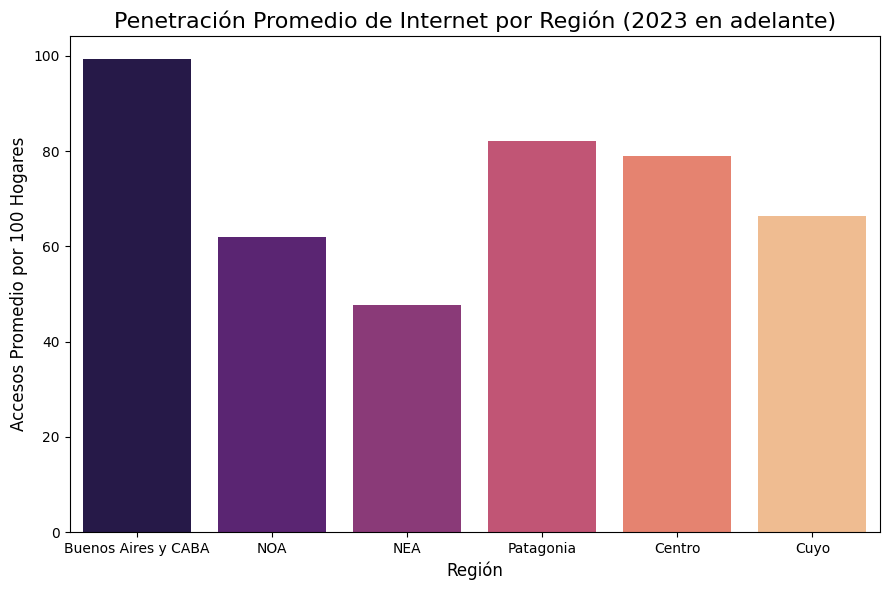

In [117]:
# Filtrar datos a partir de 2023
df_penetracion_reciente = df_penetracion[df_penetracion['anio'] >= 2023]

# Gráfico de barras
plt.figure(figsize=(9, 6))
sns.barplot(x='region', y='accesos_por_100_hogares', data=df_penetracion_reciente, estimator=np.mean, ci=None, palette='magma')

# Título y etiquetas
plt.title('Penetración Promedio de Internet por Región (2023 en adelante)', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Accesos Promedio por 100 Hogares', fontsize=12)
plt.xticks(rotation=0, ha='center')

# Visualización
plt.tight_layout()
plt.show()